# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 1: NumPy ##

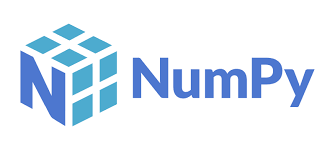

# Review

First, let's have a quick recap of the lecture. Some cool usages/tricks not mentioned in the lecture will also be discussed.

## NumPy
- NumPy stands for **Num**erical **Py**thon and is a core library for **numeric and scientific computing** in Python.
- It provides **high-performance (multidimensional) array** object, and tools for working with these arrays.
- NumPy has two powerful features: **vectorization** and **broadcasting**.

## Vectorization
In NumPy, vectorization means operating on a set of values as vectors (1-D arrays) or multidimensional arrays, **without using explicit loops** like `for` and `while`.

Here's an example to demonstrate the idea. Suppose we perform the sum of products using a for-loop:

```python
acc = 0                 # Set accumulator to 0
for a, b in zip(x, y):  # Iterate through some containers, say x and y, of the same length
    acc += a * b        # Compute the sum of products by adding one product at a time
```

The same idea can be implemented in NumPy as follows:

```python
acc = (x * y).sum()     # Compute the sum of products using NumPy
```

Thanks to vectorization, the latter code is much **shorter**, **cleaner**, and **easier to read and understand**.

Moreover, vectorization makes computation much **faster** because pre-compiled C codes are used under the hood. You can run the following code to compare.

In [1]:
import time
import numpy as np

"""
    Calculate sum of products using generic Python List and for loop
"""
x = list(range(1000000))  # Create a list of integers, 0, 1, 2, ..., 999999
y = list(range(1000000))  # Create another list of integers, 0, 1, 2, ..., 999999
acc = 0                   # Define accumulator and set it to 0
start_time = time.time()  # Start the timer and keep the time
for a, b in zip(x, y):
    acc += a * b          # Accumulate x * y to the sum
print(acc)                # Print the sum
end_time = time.time()    # Stop the timer and keep the time
print(f'The operation took {end_time - start_time} seconds') # Print the time duration

333332833333500000
The operation took 0.31826305389404297 seconds


In [2]:
"""
    Calculate sum of products using NumPy array and functions
"""
x = np.arange(1000000)    # Create a NumPy array of integers, 0, 1, 2, ..., 999999
y = np.arange(1000000)    # Create another NumPy array of integers, 0, 1, 2, ..., 999999
start_time = time.time()  # Start the timer and keep the time
acc = (x * y).sum()       # Element-wise multiplication of array x and y, then sum all the elements on the resultant array
print(acc)                # Print the sum
end_time = time.time()    # Stop the timer and keep the time
print(f'The operation took {end_time - start_time} seconds') # Print the time duration

333332833333500000
The operation took 0.004338979721069336 seconds


To make good use of NumPy, a general rule of thumb is to **avoid using explicit loops** whenever vectorization is possible. There are cases that we might need to use for/while loops, but they are rare.

## NumPy Array
NumPy arrays are at the core of vectorization. They can be seen as (multidimensional) containers of objects (numbers in most use cases) arranged in a certain shape.

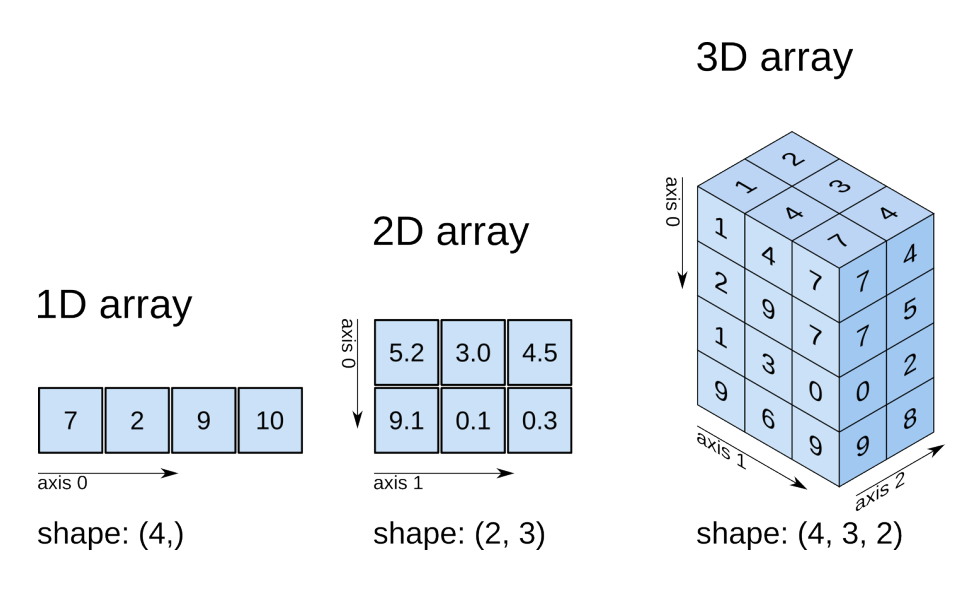

The *shape* of an array is the size of the array along each *dimension* (or *axis*).

## Creating a NumPy Array
There are many ways to create NumPy arrays, and here are some of the basics:

#### Create from iterable objects (e.g., list)

In [3]:
l = [[1, 2, 3], [2, 3, 4]]
np.array(l)

array([[1, 2, 3],
       [2, 3, 4]])

#### Create arrays of a given shape

In [4]:
shape = (2, 3)   # 2 rows and 3 columns
np.zeros(shape)  # creates an all-zero array of the given shape

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.ones(shape)   # creates an all-one array of the given shape

array([[1., 1., 1.],
       [1., 1., 1.]])

#### Create `range`-like arrays

`np.arange(...)` is roughly equivalent to `np.array(range(...))`.

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.arange(2, 10, 2)

array([2, 4, 6, 8])

For non-integer intervals, it is better to use np.linspace (linear space)

In [8]:
np.linspace(start=0, stop=1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

We can also create log-space ranges

In [9]:
np.logspace(start=1, stop=4, num=4)  # => 10^1, 10^2, 10^3, 10^4

array([   10.,   100.,  1000., 10000.])

#### Create arrays by copying another array

In [10]:
a = np.ones((2, 3))
b = a.copy()
b

array([[1., 1., 1.],
       [1., 1., 1.]])

Changes to the new array would not affect the original array (and vice versa).

In [11]:
b[0] = 0
b

array([[0., 0., 0.],
       [1., 1., 1.]])

In [12]:
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In contrast, a direct assignment does not have this effect (`a` and `b` would refer to the same array):

In [13]:
b = a
b[0] = 0
a

array([[0., 0., 0.],
       [1., 1., 1.]])

For more ways to create arrays, you can refer to the lecture notes or look into the [official NumPy tutorial](https://numpy.org/doc/stable/user/basics.creation.html).

## Dimensional Attributes of Array: `shape`, `ndim`, and `size`

NumPy arrays have many useful/important attributes describing their dimensions. Suppose we have the following array:

In [14]:
arr = np.ones((2, 3, 4))

The `shape` attribute tells us the shape of the array.

In [15]:
arr.shape

(2, 3, 4)

The shape of arrays with only a scalar value is empty.

In [16]:
np.array(2).shape

()

Another attribute is `ndim`, the number of dimensions (or axes) an array has (i.e., the length of its shape).

In [17]:
arr.ndim  # => len(arr.shape)

3

And `size`, which tells us the total size of the array (i.e., the product of its shape).

In [18]:
arr.size  # => 2*3*4

24

### Reshaping and Transpose

Sometimes, we may want to change the shape of an array.
There are many ways to do so (click [here](#Multidimensional-transpose) to skip the basics).
One way is calling `reshape` as follows:

In [19]:
# create an array
arr = np.ones((2, 3, 4))
arr.shape

(2, 3, 4)

In [20]:
# reshape the array
arr.reshape(4, 3, 2).shape

(4, 3, 2)

As long as the `size` of the reshaped array remains the same, `reshape` will work:

In [21]:
arr.reshape(6, 4).shape         # 6 * 4 == 24

(6, 4)

In [22]:
arr.reshape(1, 12, 1, 2).shape  # 1 * 12 * 1 * 2 == 24

(1, 12, 1, 2)

We can use `-1` to let NumPy infer the size of a dimension for us:

In [23]:
arr.reshape(3, -1, 1).shape     # 3 * (8) * 1 == 24

(3, 8, 1)

Note that `reshape` does not change the original array, but returns a new array.

In [24]:
arr.shape  # still in the original shape

(2, 3, 4)

NumPy also has a function `transpose` that can also change the shape of NumPy arrays. For 2-D NumPy arrays, the `transpose` function behaves just like the mathematical operation (transpose) for matrices:
$$
\begin{align}
    \begin{pmatrix}
    0 & 1 & 2 \\
    3 & 4 & 5
    \end{pmatrix} ^T =
    \begin{pmatrix}
    0 & 3 \\
    1 & 4 \\
    2 & 5
    \end{pmatrix}
\end{align}
$$

In [25]:
arr = np.arange(6).reshape(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [26]:
arr.transpose()

array([[0, 3],
       [1, 4],
       [2, 5]])

Like `reshape`, the `transpose` operation does not change the original array.

In [27]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

There is a shorthand for 2-D transpose <font color="gray">(in fact, this also works for higher-dimensional arrays, essentially "reversing" the `shape`)</font>:

In [28]:
arr.T

array([[0, 3],
       [1, 4],
       [2, 5]])

#### Multidimensional transpose <a name="Multidimensional-transpose"></a>

For $n$-D arrays where $n > 2$, `transpose` can be used to permutate the order of the dimensions of the NumPy array, as demonstrated below.

In [29]:
arr = np.arange(24).reshape(2, 3, 4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [30]:
arr.transpose(2, 0, 1).shape  # (2, 3, 4) => (4, 2, 3)

(4, 2, 3)

In [31]:
arr.transpose(2, 0, 1)

array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

Note that this is different from `reshape`, which preserves the original order of the elements:

In [32]:
arr.reshape(4, 2, 3)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

Although `reshape` does not make any mathematical sense (unlike `transpose`), it still comes in handy sometimes (you'll see).

**Exercise:** what is the shape of the following transposed array?

In [ ]:
arr = np.zeros((8, 2, 5, 3)).transpose(1, 0, 3, 2)
arr.shape

## Data Type (`dtype`) of NumPy Array

Besides dimensional attributes like `shape` and `ndim`, every array has a data type attribute, `dtype`, **shared by all its elements**.

In [34]:
arr = np.array([1, 2, 3])
arr.dtype

dtype('int64')

During array creation, if we store objects of different types in an array, objects with less general data types will be stored in more general data types.

In [35]:
arr = np.array([1, 2, 3.14])
arr.dtype

dtype('float64')

In [36]:
arr[0].dtype

dtype('float64')

The most general data type is `object`.

In [37]:
class EmptyClass:
    pass # The pass statement is used as a placeholder for future code

empty_object = EmptyClass()
arr = np.array([1, 2, empty_object, 'hello'])
print(arr.dtype)

object


But if an array has already been created, new values assigned to it will be converted to the `dtype` of the array (if possible).

In [38]:
arr = np.array([1, 2, 3])
arr.dtype

dtype('int64')

In [39]:
arr[0] = 1.99
arr[0].dtype

dtype('int64')

This could lead to unexpected results, so beware of the data type of your array (!)

In [40]:
arr

array([1, 2, 3])

On the other hand, if such a conversion is impossible, an error will be raised.

In [41]:
arr[0] = 'COMP2211'

ValueError: invalid literal for int() with base 10: 'COMP2211'

### Data Type Manipulation

You have learned in the lecture that you can specify the data type of an array **at** its creation (it will be inferred if not specified).

In [42]:
np.arange(10, dtype=np.float32).dtype

dtype('float32')

It is also possible to change the data type of an array **after** its creation by calling `astype`.

In [43]:
np.arange(10).astype(np.float32).dtype

dtype('float32')

You can also do **implicit data type conversion**. For example, from int to float:

In [44]:
a = np.arange(10) * 3.14
a.dtype

dtype('float64')

Similarly, from bool to int, and vice versa:

In [45]:
a = np.array([True, False, True])
a

array([ True, False,  True])

In [46]:
a * 1  # True => 1, False => 0 (and vice versa)

array([1, 0, 1])

In [47]:
a.astype(bool)

array([ True, False,  True])

## Array Indexing

Now that we know how to create an array and manipulate its main attributes, we probably want to look at or operate on certain elements of an array from time to time. To select the elements that we are interested in, we use array indexing.

There are three main indexing methods for NumPy arrays. We start with **basic indexing** (and slicing), and then review two more advanced indexing methods: **integer array indexing** and **boolean array indexing**.

### Basic Indexing & Slicing

NumPy supports the Pythonic way to index/slice arrays like `list` (click [here](#Multidimensional-indexing) to skip the very basics).


In [48]:
a = np.arange(10)  # Create a NumPy array with values, 0, 1, 2, ..., 9
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
print('(A)', a[1], a[-1], a[-2]) # select single elements
print('(B)', a[1:4])             # slice between two indices (the right index is excluded)
print('(C)', a[:4])              # slice between 0 and another index; this equals a[0:4]
print('(D)', a[4:])              # slice between an index and the last index (included); this equals a[4:10]
print('(E)', a[4::2])            # slice with increment
print('(F)', a[8:2:-1])          # slice in the reverse order (increment = -1)
print('(G)', a[:])               # slice the whole array

(A) 1 9 8
(B) [1 2 3]
(C) [0 1 2 3]
(D) [4 5 6 7 8 9]
(E) [4 6 8]
(F) [8 7 6 5 4 3]
(G) [0 1 2 3 4 5 6 7 8 9]


Note that indexing selects a single element while slicing selects an array (even if the selected array only has one element).

In [50]:
print(a[1])
print(a[1:2])

1
[1]


#### Multidimensional indexing <a name="Multidimensional-indexing"></a>

When there is more than one dimension, the indexing for each dimension should be separated by a **comma**, e.g., `a[0, 1]`. The indexing order follows the same order as what the `shape` attribute shows. For 2-D arrays, rows go before columns.

![](https://i.stack.imgur.com/h1alT.jpg)

Let's take a 3-D array as a more general example: <a class="anchor-link" href="#Basic-Indexing-ND-Examples"></a>

In [51]:
a = np.arange(24).reshape(2, 3, 4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [52]:
a[1, 1:3, ::-1]

array([[19, 18, 17, 16],
       [23, 22, 21, 20]])

In [53]:
a[..., ::-1]  # we can use ... to select all other dimensions

array([[[ 3,  2,  1,  0],
        [ 7,  6,  5,  4],
        [11, 10,  9,  8]],

       [[15, 14, 13, 12],
        [19, 18, 17, 16],
        [23, 22, 21, 20]]])

In [54]:
a[1]  # equivalent to a[1, :, :] and a[1, ...]

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Let's try some exercises.

In [55]:
import numpy as np
arr = np.arange(0, 50).reshape(5, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

Given the array above, can you slice it correctly?

In [ ]:
# how to select the following?
# output: [[13, 14, 15],
#          [23, 24, 25],
#          [33, 34, 35]]


In [ ]:
# how to select the same array, but with all the even numbers removed?
# output: [[ 1,  3,  5,  7,  9],
#          [11, 13, 15, 17, 19],
#           ...
#          [41, 43, 45, 47, 49]]


In [ ]:
# how to select the vertical column 5, 15, ...?
# output: [ 5, 15, 25, 35, 45]


In [ ]:
# how to select the vertical column 5, 15, ..., but this time preserving the axes?
# output: [[ 5],
#          [15],
#          [25],
#          [35],
#          [45]]


### Integer Array Indexing

Besides the Pythonic way of indexing (slicing) NumPy arrays, there's a more advanced way to index NumPy arrays using **integer** arrays (could be a list or a NumPy array with integer elements).

Integer array indexing offers a way to deal with cases that cannot be easily handled by basic indexing and slicing. Imagine you have the following array and want to select elements at irregular indices such as 0, 2, 3, and 9.

In [60]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

This can be easily done via integer array indexing:

In [61]:
a[[0, 2, 3, 9]]  # => np.array([ a[0], a[2], a[3], a[9] ])

array([0, 2, 3, 9])

Note that the index inside `[ ]` is **a list of integers** instead of **an integer** or **a slice**. In fact, integer array indexing can be seen as a more general form of slicing, e.g., `a[0:4]` is short for `a[[0,1,2,3]]`.

For multidimensional cases, the syntax is analogues:

In [62]:
a = np.arange(16).reshape(4, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [63]:
a[[0, 1, 2, 3], [0, 1, 2, 3]]  # => np.array([ a[0, 0], a[1, 1], a[2, 2], a[3, 3] ])

array([ 0,  5, 10, 15])

We can also arrange the selected elements into specific shapes:

In [64]:
a[[[0, 1], [2, 3]], [[0, 1], [2, 3]]]  # => np.array([ [a[0, 0], a[1, 1]],
                                       #               [a[2, 2], a[3, 3]] ])

array([[ 0,  5],
       [10, 15]])

Let's try some exercises.

In [65]:
import numpy as np
arr = np.arange(0, 50).reshape(5, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

Given the array above, can you index the required elements correctly?

In [ ]:
# how to swap the first and last row?
# output: [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
#          [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
#          [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
#          [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
#          [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]]


In [ ]:
# how to copy the row [10, 11, 12, ..., 19] 3 times?
# output: [[10, 11, 12, ..., 19],
#          [10, 11, 12, ..., 19],
#          [10, 11, 12, ..., 19]]


In [ ]:
# how to select the following "stair"?
# output: [[ 0,  1],
#          [11, 12],
#          [22, 23]]


The indexing methods above allow us to easily copy and amend the values without writing long codes.

### Boolean Array Indexing

Apart from integer arrays, we can also use boolean arrays containing `True` and `False` to select elements. Only `True` elements will be selected.

In [70]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [71]:
# selecting individual elements
selection = np.array([[False, True, False],
                      [True,  True,  True],
                      [False, True, False]])
print(a[selection])  # Boolean Array Indexing

[1 3 4 5 7]


In [72]:
# selecting rows
selection = np.array([True, False, True])
print(a[selection])  # Boolean Array Indexing

[[0 1 2]
 [6 7 8]]


Boolean array indexing is especially useful for selecting elements whose values are under certain conditions.
Such boolean arrays can be obtained through condition tests, e.g., smaller than or greater than:

In [73]:
a < 2   # => a 2D array with True value for elements whose value < 2, and False otherwise

array([[ True,  True, False],
       [False, False, False],
       [False, False, False]])

In [74]:
a > 6   # => a 2D array with True value for elements whose value > 6, and False otherwise

array([[False, False, False],
       [False, False, False],
       [False,  True,  True]])

Boolean arrays can be combined using [logical operations](https://numpy.org/doc/stable/reference/routines.logic.html#logical-operations) of NumPy.

In [75]:
selection = np.logical_or(a < 2, a > 6)  # Logical OR, return a 2D array with True value for those entry value < 6 OR value > 10, false otherwise
selection = (a < 2) | (a > 6)  # Same as the previous line
selection

array([[ True,  True, False],
       [False, False, False],
       [False,  True,  True]])

In [76]:
a[selection]

array([0, 1, 7, 8])

Let's try some exercises.

In [77]:
import numpy as np
arr = np.arange(0, 50).reshape(5, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

Given the above array, can you generate the correct arrays as required below?

In [ ]:
# how to generate a boolean mask of arr, where each entry is TRUE if the entry is divisible by 3, and false otherwise?
# output: [[ True, False, False,  True, False, False,  True, False, False,  True],
#          [False, False,  True, False, False,  True, False, False,  True, False],
#          [False,  True, False, False,  True, False, False,  True, False, False],
#          [ True, False, False,  True, False, False,  True, False, False,  True],
#          [False, False,  True, False, False,  True, False, False,  True, False]]


In [ ]:
# how to select all values that are divisible by 3?
# output: [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]


In [ ]:
# how to change each value divisible by 3 into -1?
# output: [[-1,  1,  2, -1,  4,  5, -1,  7,  8, -1],
#          [10, 11, -1, 13, 14, -1, 16, 17, -1, 19],
#          [20, -1, 22, 23, -1, 25, 26, -1, 28, 29],
#          [-1, 31, 32, -1, 34, 35, -1, 37, 38, -1],
#          [40, 41, -1, 43, 44, -1, 46, 47, -1, 49]]


In [81]:
# Key learning points:
# What are the differences between these?
# A) arr % 3
# B) arr % 3 == 0
# C) arr[arr % 3 == 0]
# D) arr[arr % 3 == 0] = -1

## Array Operations

We have learned how to select elements from an array. Now it's time for some real operation!

### Assignment
As we have already seen, we can assign new values to a single element:

In [82]:
a = np.arange(9)
a[5] = 999
a

array([  0,   1,   2,   3,   4, 999,   6,   7,   8])

or to a set of elements through a single assignment:

In [83]:
a = np.arange(9)
a[1::2] = 999
a

array([  0, 999,   2, 999,   4, 999,   6, 999,   8])

You can even assign through lists or arrays:

In [84]:
a = np.arange(9)
a[1::2] = [111, 333, 555, 777]
a

array([  0, 111,   2, 333,   4, 555,   6, 777,   8])

In [85]:
a = np.arange(9).reshape(3, 3)
a[[0, -1], :] = [999, 999, 999]
a

array([[999, 999, 999],
       [  3,   4,   5],
       [999, 999, 999]])

In [86]:
a = np.arange(9).reshape(3, 3)
b = np.array([[444, 555], [777, 888]])
a[1:, 1:] = b
a

array([[  0,   1,   2],
       [  3, 444, 555],
       [  6, 777, 888]])

### Arithmetic operations

NumPy supports elementwise arithmetic operations (+, -, \*, /) and basic matrix operations (e.g. dot product).

In [87]:
a = np.arange(6).reshape(2, 3)        # a = [ [0 1 2]
                                      #       [3 4 5] ]
b = np.arange(10, 16).reshape(2, 3)   # b = [ [10 11 12]
                                      #       [13 14 15] ]

In [88]:
a + b

array([[10, 12, 14],
       [16, 18, 20]])

In [89]:
a @ b.T  # a @ b.T is equivalent to np.dot(a, b.T)
         # For 2-D arrays like `a` and `b`, this is just matrix multiplication

array([[ 35,  44],
       [134, 170]])

### Other useful operations/functions

NumPy provides many different functions for performing computations on arrays. A few useful ones are given below.


#### `np.sum(...)`, `np.min(...)`, `np.max(...)`

In [90]:
a = np.arange(6).reshape(2, 3)  # a = [ [0 1 2]
                                #       [3 4 5] ]
print(a)
print(np.sum(a))      # Find the sum of all the elements
print(a.sum())        # This is equivalent to the previous line

[[0 1 2]
 [3 4 5]]
15
15


In [91]:
print(a.sum(axis=0))  # Find the sum along the first axis, i.e., the vertical axis, (0+3), (1+4), (2+5)
print(a.sum(axis=1))  # Find the sum along the second axis, i.e., the horizontal axis, (0+1+2), (3+4+5)

[3 5 7]
[ 3 12]


In [92]:
print(a.min())        # Find the min for the whole array
print(a.min(axis=0))  # Find the min along the first axis
print(a.min(axis=1))  # Fine the min along the second axis

0
[0 1 2]
[0 3]


You can also specify **multiple axes** to sum up along (or to find min along, etc.):

In [93]:
a = np.zeros((5, 7, 3, 2, 9))
a.sum(axis=(0, 1)).shape

(3, 2, 9)

#### `np.vstack(...)`, `np.hstack(...)`, `np.concatenate(...)`

If you want to concatenate two arrays and not just add them, you can perform vertical stacking and horizontal stacking:

In [94]:
a = np.arange(6).reshape(2,3)       # a=[[0 1 2]
                                    #    [3 4 5]]
b = np.arange(10,16).reshape(2,3)   # b=[[10 11 12]
                                    #    [13 14 15]]
print(np.vstack((a, b)))
print(np.hstack((a, b)))

[[ 0  1  2]
 [ 3  4  5]
 [10 11 12]
 [13 14 15]]
[[ 0  1  2 10 11 12]
 [ 3  4  5 13 14 15]]


or more generally, you can use `np.concatenate(...)`:

In [95]:
np.concatenate((a, b), axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [10, 11, 12],
       [13, 14, 15]])

In [96]:
np.concatenate((a, b), axis=1)

array([[ 0,  1,  2, 10, 11, 12],
       [ 3,  4,  5, 13, 14, 15]])

#### `np.expand_dims(...)` and `np.newaxis`

These are used to add new dimensions (or axes) of size 1 to an array. Feel free to [skip](#What's-more) if you are familiar with them.

In [97]:
import numpy as np
a = np.array([0, 1, 2, 3])              # shape (4,)

print(a.shape)
print(np.expand_dims(a, axis=0).shape)  # shape (1, 4)
print(np.expand_dims(a, axis=1).shape)  # shape (4, 1)
print(np.expand_dims(a, axis=(0, 1, 2)).shape)  # shape (1, 1, 1, 4)
print(np.expand_dims(a, axis=(0, 1, 3)).shape)  # shape (1, 1, 4, 1)

(4,)
(1, 4)
(4, 1)
(1, 1, 1, 4)
(1, 1, 4, 1)


This can also be done through indexing with `np.newaxis`:

In [98]:
print(a[np.newaxis, :].shape)  # equivalent to np.expand_dims(a, axis=0)
print(a[:, np.newaxis].shape)  # equivalent to np.expand_dims(a, axis=1)

(1, 4)
(4, 1)


Or even simpler:

In [99]:
print(a[None, :].shape)
print(a[:, None].shape)

(1, 4)
(4, 1)


And all these above are equivalent to:

In [100]:
print(a.reshape((1, 4)).shape)
print(a.reshape((4, 1)).shape)

(1, 4)
(4, 1)


#### What's more <a name="What's-more"></a>

NumPy also provides many useful functions for getting statistics, such as  [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [median](https://numpy.org/doc/stable/reference/generated/numpy.median.html), [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), etc. Also, many other functions, like generating [random numbers](https://numpy.org/doc/stable/reference/random/index.html), are very important and useful for scientific research, especially machine learning.
We encourage you to explore them by yourselves!

## Broadcasting

The second most important feature of NumPy is broadcasting. It allows us to perform operations between certain arrays with **different shapes**. This can make our code much more concise.

To demonstrate, suppose we would like to create an array that looks like this:
```
array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])
```
Pause and think about how to do this.

Of course, we can do this:
```python
a = np.zeros((4, 3), dtype=int)
for i in range(4):
    for j in range(3):
        a[i, j] = i * 10 + (j+1)
```
But this is tedious. Surely there is no better way?

Thankfully, with the help of broadcasting, we can simply do this:

In [101]:
a = np.arange(4) * 10
b = np.arange(1, 4)
a[:, None] + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

To understand this magic, we need to know the rules of broadcasting ([skip](#Exercise:) to exercise if you are familiar with the rules)

### General Rules of Broadcasting (from [NumPy documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html#general-broadcasting-rules))

For broadcasting to work, the shape of the input arrays must meet certain conditions.

When operating on two arrays, NumPy compares their shapes element-wise **from right to left**. Two dimensions are compatible when

1. their sizes are equal, or
2. one of their sizes is 1.

Note that input arrays do not need to have the same number of dimensions, i.e., their `ndim` may be different. **Missing dimensions are assumed to have size 1**. Broadcasting only works if these conditions are met; otherwise, an error will be thrown.

**Question.** Given array `a` as follows:

In [102]:
import numpy as np

a = np.array([
    [ 0,  0,  0],
    [10, 10, 10],
    [20, 20, 20],
    [30, 30, 30]
])
a.shape

(4, 3)

which ones of the following arrays can be broadcasted with respect to array `a`?

In [103]:
b = np.arange(1, 4)  # shape (3,)
c = np.arange(1, 5)  # shape (4,)
d = np.ones((4, 1))  # shape (4, 1)
e = np.ones((1, 3))  # shape (1, 3)
f = np.ones((2, 3))  # shape (2, 3)
# the answer is b, d, and e

For compatible input arrays, the resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays.

In [104]:
(a + b).shape

(4, 3)

Dimensions with size 1 are **stretched or “copied”** to match the other.


![](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [105]:
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

Now it's easy to see how the previous example works:
```python
a = np.arange(4) * 10  # (4,)
b = np.arange(1, 4)    # (3,)
a[:, None] + b         # (4, 1) + (3,) ==> (4, 1) + (1, 3) ==> (4, 3) + (4, 3) ==> (4, 3)
```

![](https://numpy.org/doc/stable/_images/broadcasting_4.png)

#### Exercise: <a name="Exercise:"></a>

In [ ]:
# given
a = np.arange(3)     # [0, 1, 2], shape (3,)
b = np.array([1, 1, 1, 1, 1])   # shape (5,)
# how to generate the following array using broadcasting?
# output: [[0, 1, 2],
#          [0, 1, 2],
#          [0, 1, 2],
#          [0, 1, 2],
#          [0, 1, 2]]


## Last but not least

The capability of NumPy is vast and we have only touched the basics. To master it, you need to **practice a lot** and **try to solve problems on your own** (we will show you some real tasks next).

If there's anything unclear in the notes or if you encounter any problem, you can approach us, but most of the time, Google is your best help. There are a vast amount of resources out there on the internet. [NumPy documentation](https://numpy.org/doc/stable/index.html) might be a good starting point.

In [107]:
### This is the end of the review.
### Referenced from COMP2211 notes and NumPy official documentation